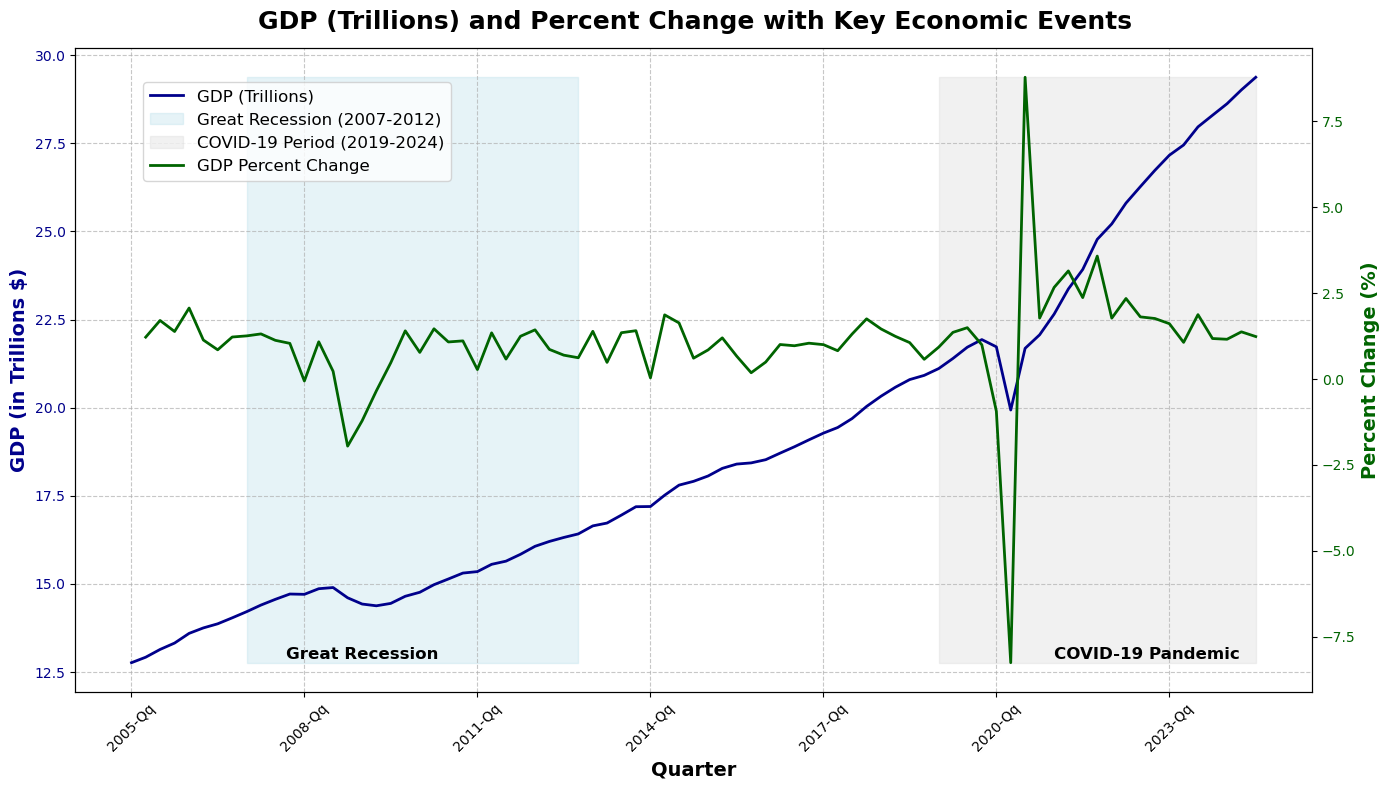

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("../Data/GDP.csv")

data['observation_date'] = pd.to_datetime(data['observation_date'])

data['GDP_in_Trillions'] = data['GDP'] / 1000

data['Percent_Change'] = data['GDP'].pct_change() * 100

recession_start, recession_end = pd.Timestamp('2007-01-01'), pd.Timestamp('2012-12-31')
covid_start, covid_end = pd.Timestamp('2019-01-01'), pd.Timestamp('2024-12-31')

fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.plot(data['observation_date'], data['GDP_in_Trillions'], color='darkblue', linestyle='-', linewidth=2, label='GDP (Trillions)')
ax1.set_ylabel('GDP (in Trillions $)', fontsize=14, color='darkblue', fontweight='bold')
ax1.tick_params(axis='y', labelcolor='darkblue')
ax1.grid(True, linestyle='--', alpha=0.7)

ax2 = ax1.twinx()
ax2.plot(data['observation_date'], data['Percent_Change'], color='darkgreen', linestyle='-', linewidth=2, label='GDP Percent Change')
ax2.set_ylabel('Percent Change (%)', fontsize=14, color='darkgreen', fontweight='bold')
ax2.tick_params(axis='y', labelcolor='darkgreen')

ax1.fill_between(
    data['observation_date'], 
    data['GDP_in_Trillions'].min(), 
    data['GDP_in_Trillions'].max(),
    where=(data['observation_date'] >= recession_start) & (data['observation_date'] <= recession_end),
    color='lightblue', alpha=0.3, label='Great Recession (2007-2012)'
)
ax1.annotate(
    'Great Recession', 
    xy=(pd.Timestamp('2009-01-01'), data['GDP_in_Trillions'].min() + 0.1),
    xycoords='data', color='black', fontsize=12, ha='center', fontweight='bold'
)

ax1.fill_between(
    data['observation_date'], 
    data['GDP_in_Trillions'].min(), 
    data['GDP_in_Trillions'].max(),
    where=(data['observation_date'] >= covid_start) & (data['observation_date'] <= covid_end),
    color='lightgrey', alpha=0.3, label='COVID-19 Period (2019-2024)'
)
ax1.annotate(
    'COVID-19 Pandemic', 
    xy=(pd.Timestamp('2021-01-01'), data['GDP_in_Trillions'].min() + 0.1),
    xycoords='data', color='black', fontsize=12, ha='left', fontweight='bold'
)

fig.suptitle('GDP (Trillions) and Percent Change with Key Economic Events', fontsize=18, fontweight='bold')
ax1.set_xlabel('Quarter', fontsize=14, fontweight='bold')

ax1.set_xticks(data['observation_date'][::12])
ax1.set_xticklabels(data['observation_date'][::12].dt.strftime('%Y-Q%q'), rotation=45, fontsize=10)

fig.legend(fontsize=12, loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>